In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd

In [19]:
new_df=pd.read_csv('/content/drive/MyDrive/Asthma/new_asthma.csv')
new_df.head()


,Unnamed: 0,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0


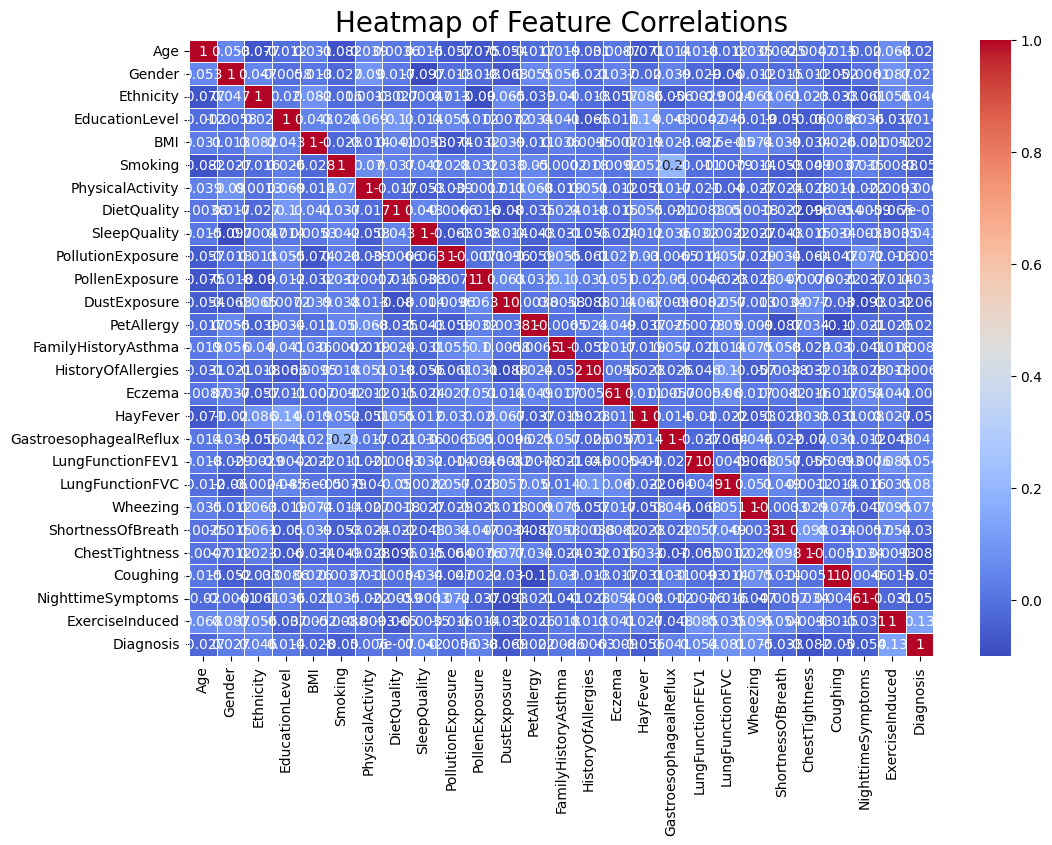

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Asthma/new_asthma.csv')

# Optional: Drop non-numeric columns if necessary (like 'Unnamed: 0')
df = df.drop(columns=['Unnamed: 0'])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and show plot
plt.title('Heatmap of Feature Correlations', fontsize=20)
plt.show()


In [21]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4536 non-null   int64  
 1   Gender                  4536 non-null   int64  
 2   Ethnicity               4536 non-null   int64  
 3   EducationLevel          4536 non-null   int64  
 4   BMI                     4536 non-null   float64
 5   Smoking                 4536 non-null   int64  
 6   PhysicalActivity        4536 non-null   float64
 7   DietQuality             4536 non-null   float64
 8   SleepQuality            4536 non-null   float64
 9   PollutionExposure       4536 non-null   float64
 10  PollenExposure          4536 non-null   float64
 11  DustExposure            4536 non-null   float64
 12  PetAllergy              4536 non-null   int64  
 13  FamilyHistoryAsthma     4536 non-null   int64  
 14  HistoryOfAllergies      4536 non-null   

# Model Building

* Random Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
X = new_df.drop('Diagnosis', axis=1)
y = new_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf_model = RandomForestClassifier(n_estimators=70,max_depth=6,max_features='sqrt')

rf_model.fit(X_train, y_train)
#Training Score
print(rf_model.score(X_train, y_train))

y_pred = rf_model.predict(X_test)
#Testing Score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9200661521499449
0.8887665198237885
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       479
           1       0.81      0.99      0.89       429

    accuracy                           0.89       908
   macro avg       0.90      0.89      0.89       908
weighted avg       0.91      0.89      0.89       908



In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08480176211453745

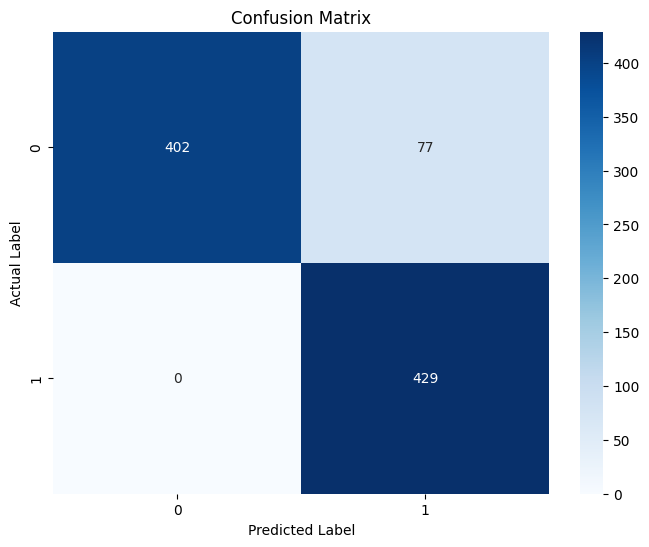

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
class_labels = {
    0: "No",
    1: "Yes"
    }

models = {
    "Random Forest": rf_model
}

user_data_list = [
              [[53,0,2,1,37.92302,0,3.741621,2.571249,7.854012,4.12622,7.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]],  #Dataset No
              [[61,1,1,1,27.281,0,4.990117,2.694982,9.56158,1.933415,5.116137,6.170154,1,0,0,0,1,0,2.250033,2.800118,1,0,1,0,0,1]], #Dataset Yes

              [[60,0,1,3,35.92302,0,5.741621,5.571249,8.854012,3.12622,6.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]], #No
             [[61,1,1,1,35.281,0,9.990117,2.694982,9.56158,1.933415,8.116137,7.170154,1,1,1,0,1,0,2.250033,1.800118,1,0,1,0,0,1]], #yes
             [[60,0,1,3,35.92302,0,5.741621,5.571249,8.854012,3.12622,6.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]], #No
                #No
]

# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        user_data1=pd.DataFrame(user_data, columns=['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking','PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure','PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma','HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux','LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath','ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced'])
        prediction = model.predict(user_data1)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")
    print("\n")

Testing on data: [[53, 0, 2, 1, 37.92302, 0, 3.741621, 2.571249, 7.854012, 4.12622, 7.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Random Forest Prediction: 0 - No


Testing on data: [[61, 1, 1, 1, 27.281, 0, 4.990117, 2.694982, 9.56158, 1.933415, 5.116137, 6.170154, 1, 0, 0, 0, 1, 0, 2.250033, 2.800118, 1, 0, 1, 0, 0, 1]]
Random Forest Prediction: 1 - Yes


Testing on data: [[60, 0, 1, 3, 35.92302, 0, 5.741621, 5.571249, 8.854012, 3.12622, 6.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Random Forest Prediction: 0 - No


Testing on data: [[61, 1, 1, 1, 35.281, 0, 9.990117, 2.694982, 9.56158, 1.933415, 8.116137, 7.170154, 1, 1, 1, 0, 1, 0, 2.250033, 1.800118, 1, 0, 1, 0, 0, 1]]
Random Forest Prediction: 0 - No


Testing on data: [[60, 0, 1, 3, 35.92302, 0, 5.741621, 5.571249, 8.854012, 3.12622, 6.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Random Forest Prediction: 0 - No




In [29]:
import pickle

# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [30]:
new_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')